In [1]:
#Load the Data and Merge datasets on 'time' column. Also, Create and Train the Linear Regression Model


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the temperature and humidity data
temperature_data = pd.read_csv('DHT_22-temperature.csv')
humidity_data = pd.read_csv('DHT_22-humidity.csv')

# Display the first few rows to verify the data
print(temperature_data.head())
print(humidity_data.head())

# Merge the dataframes on the 'time' column
temperature_data['time'] = pd.to_datetime(temperature_data['time'])
humidity_data['time'] = pd.to_datetime(humidity_data['time'])
merged_data = pd.merge(temperature_data, humidity_data, on='time')

# Prepare the independent (X) and dependent (y) variables
X = merged_data['temperature'].values.reshape(-1, 1)
y = merged_data['humidity'].values

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

                             time  temperature
0  2024-08-01T09:43:08.696008728Z    29.200001
1    2024-08-01T09:43:14.8403688Z    29.100000
2  2024-08-01T09:43:18.834110282Z    29.200001
3  2024-08-01T09:44:44.440024594Z    29.299999
4  2024-08-01T09:44:48.535760754Z    29.200001
                             time   humidity
0  2024-08-01T09:41:57.429459788Z  39.700001
1  2024-08-01T09:42:29.988683981Z  39.599998
2  2024-08-01T09:42:32.039575804Z  39.700001
3  2024-08-01T09:42:34.085933725Z  39.599998
4  2024-08-01T09:42:36.132607595Z  39.700001


LinearRegression()

In [3]:
#Interpolate and Predict


In [4]:
# Find the min and max temperature values
min_temp = X.min()
max_temp = X.max()

# Interpolate to create 100 equally distant temperature values
test_temperatures = np.linspace(min_temp, max_temp, 100).reshape(-1, 1)

# Predict humidity for the test temperature values
predicted_humidity = model.predict(test_temperatures)

# Display the results
print(f"Min Temperature: {min_temp}")
print(f"Max Temperature: {max_temp}")
print(f"First 5 Test Temperatures: {test_temperatures[:5]}")
print(f"First 5 Predicted Humidity: {predicted_humidity[:5]}")


Min Temperature: 26.70000076
Max Temperature: 29.60000038
First 5 Test Temperatures: [[26.70000076]
 [26.72929369]
 [26.75858661]
 [26.78787954]
 [26.81717246]]
First 5 Predicted Humidity: [40.52668943 40.50946543 40.49224142 40.47501742 40.45779341]


In [5]:
#Plot the Data and Trend Line


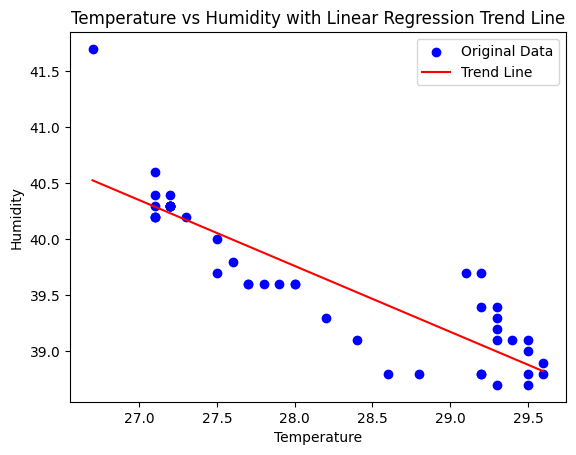

In [6]:
# Scatter plot of the original data
plt.scatter(merged_data['temperature'], merged_data['humidity'], color='blue', label='Original Data')

# Plot the trend line
plt.plot(test_temperatures, predicted_humidity, color='red', label='Trend Line')

# Add labels and legend
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity with Linear Regression Trend Line')
plt.legend()
plt.show()


In [7]:
#Filter Outliers


                                  time  temperature   humidity
38 2024-08-01 10:23:26.158403840+00:00    27.100000  40.400002
40 2024-08-01 10:23:36.296651502+00:00    27.100000  40.200001
30 2024-08-01 10:21:13.755485291+00:00    27.200001  40.299999
35 2024-08-01 10:22:57.589553274+00:00    27.200001  40.299999
33 2024-08-01 10:22:47.451445248+00:00    27.200001  40.299999
37 2024-08-01 10:23:22.063170334+00:00    27.200001  40.400002
42 2024-08-01 10:24:43.573025545+00:00    27.200001  40.299999
41 2024-08-01 10:23:38.344953174+00:00    27.200001  40.299999
39 2024-08-01 10:23:28.207161824+00:00    27.200001  40.299999
31 2024-08-01 10:21:15.803760721+00:00    27.299999  40.200001
27 2024-08-01 10:16:46.798432953+00:00    27.500000  39.700001
29    2024-08-01 10:18:44.967964+00:00    27.500000  40.000000
28 2024-08-01 10:16:48.845983207+00:00    27.600000  39.799999
26 2024-08-01 10:15:13.102779102+00:00    27.700001  39.599998
25 2024-08-01 10:15:00.814560791+00:00    27.700001  39

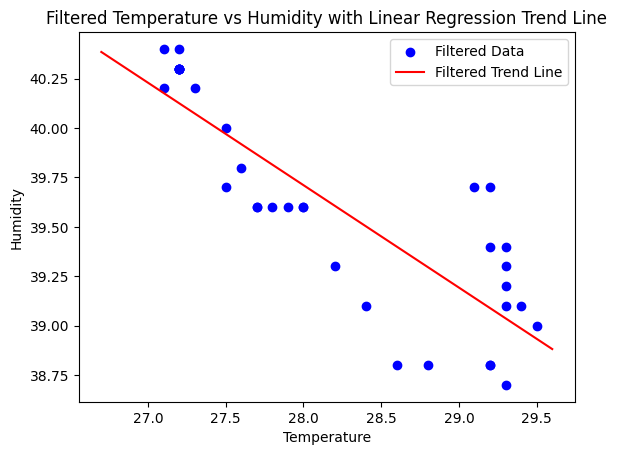

In [8]:
# Remove the 5 highest and 5 lowest temperature values
filtered_data = merged_data.sort_values(by='temperature').iloc[5:-5]

# Extract the filtered temperature and humidity values
X_filtered = filtered_data['temperature'].values.reshape(-1, 1)
y_filtered = filtered_data['humidity'].values

# Print the filtered data
print(filtered_data)


# Train the Linear Regression model with filtered data
model_filtered = LinearRegression()
model_filtered.fit(X_filtered, y_filtered)

# Predict humidity for test temperatures using the filtered model
predicted_humidity_filtered = model_filtered.predict(test_temperatures)

# Plot the filtered data and trend line
plt.scatter(filtered_data['temperature'], filtered_data['humidity'], color='blue', label='Filtered Data')
plt.plot(test_temperatures, predicted_humidity_filtered, color='red', label='Filtered Trend Line')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Filtered Temperature vs Humidity with Linear Regression Trend Line')
plt.legend()
plt.show()


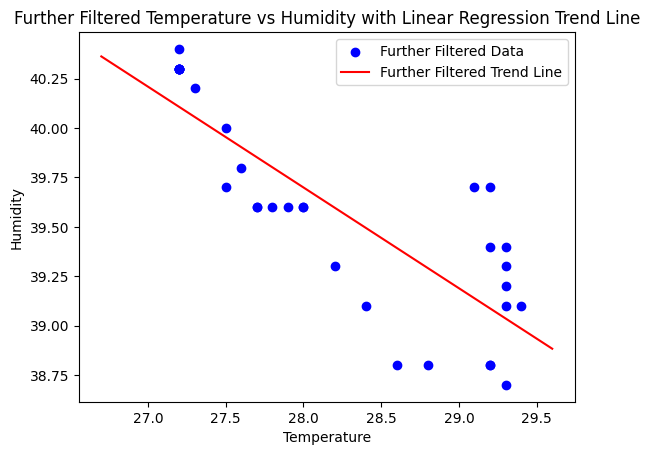

In [9]:
# Further filter out outliers
further_filtered_data = filtered_data[(filtered_data['temperature'] < filtered_data['temperature'].quantile(0.98)) & 
                             (filtered_data['temperature'] > filtered_data['temperature'].quantile(0.02))]

# Prepare further filtered data for training
X_further_filtered = further_filtered_data[['temperature']].values
y_further_filtered = further_filtered_data['humidity'].values

# Train the Linear Regression model with further filtered data
model_further_filtered = LinearRegression()
model_further_filtered.fit(X_further_filtered, y_further_filtered)

# Predict humidity for test temperatures using the further filtered model
predicted_humidity_further_filtered = model_further_filtered.predict(test_temperatures)

# Plot the further filtered data and trend line
plt.scatter(further_filtered_data['temperature'], further_filtered_data['humidity'], color='blue', label='Further Filtered Data')
plt.plot(test_temperatures, predicted_humidity_further_filtered, color='red', label='Further Filtered Trend Line')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Further Filtered Temperature vs Humidity with Linear Regression Trend Line')
plt.legend()
plt.show()
